In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

In [22]:
DataPath = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv"

In [23]:
#step1-read data
#df = pd.read_csv(DataPath)
#df.head(5)

#step2-convert to numpy
#data = df.to_numpy()
#data

#step3-extract features and label data
#X = data[:,:-1]
#Y = data[:,-1]

#step4-one hot encoding
#N,D = X.shape
#X2 = np.zeros((N,D+3))
#X2[:,:(D-1)] = X[:,:(D-1)]
#for i in range(N):
#    t = int(X[i,(D-1)])
#    X2[i,t+(D-1)] = 1

#step5-normalize numerical columns
#for col in (1,2):
#    X2[:,col] = (X2[:,col] - X2[:,col].mean())/X2[:,col].std()

#step6-split train and test
#Xtrain = X2[:-100]
#Ytrain = Y[:-100]
#Xtest = X2[-100:]
#Ytest = Y[-100:]

In [24]:
#将step1-step6打包进一个函数中
def get_data(path):
     #step1-read data
     df = pd.read_csv(path)

     #step2-convert to numpy
     data = df.to_numpy()

     #step3-extract features and label data
     X = data[:,:-1]
     Y = data[:,-1]

     #step4-one hot encoding
     N,D = X.shape
     X2 = np.zeros((N,D+3))
     X2[:,:(D-1)] = X[:,:(D-1)]
     for i in range(N):
          t = int(X[i,(D-1)])
          X2[i,t+(D-1)] = 1
  
     #step5-split train and test
     Xtrain = X2[:-100]
     Ytrain = Y[:-100]
     Xtest = X2[-100:]
     Ytest = Y[-100:]
    
     #step6-normalize numerical columns
     for col in (1,2):
          m = Xtrain[:,col].mean()
          s = Xtrain[:,col].std()
          Xtrain[:,col] = (Xtrain[:,col] - m)/s
          Xtest[:,col] = (Xtest[:,col] - m)/s

     return Xtrain,Ytrain,Xtest,Ytest

In [25]:
#step7 -only return the data from the first 2 classes

#X2train = Xtrain[Ytrain <= 1]
#Y2train = Ytrain[Ytrain <= 1]
#X2test = Xtest[Ytest <= 1]
#Y2test = Ytest[Ytest <= 1]


In [26]:
#将step1-step7打包进一个函数中
def get_binary_data(path):
    
    Xtrain,Ytrain,Xtest,Ytest = get_data(path)

    X2train = Xtrain[Ytrain <= 1]
    Y2train = Ytrain[Ytrain <= 1]
    X2test = Xtest[Ytest <= 1]
    Y2test = Ytest[Ytest <= 1]

    return X2train,Y2train,X2test,Y2test

In [27]:
#get data
Xtrain,Ytrain,Xtest,Ytest = get_binary_data(DataPath)

In [28]:
# randomly initialize weights

D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

In [29]:
# define functions for making predictions

def sigmoid(a):
    return 1/(1+np.exp(-a))

def forward(X,W,b):
    return sigmoid(X.dot(W)+b)


# valuate model output
def classification_rate(Y,P):
    return np.mean(Y==P)

# cross entropy function (pY=prediction of Y) 
def cross_entropy(Y,pY):
    return -np.mean(Y*np.log(pY) + (1-Y)*np.log(1-pY))


In [30]:
train_cost = []
test_cost = []
learning_rate = 0.001


In [31]:
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain,pYtrain)
    ctest = cross_entropy(Ytest,pYtest)

    train_cost.append(ctrain)
    test_cost.append(ctest)

    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain).sum()

    if i % 1000 == 0:
        print(i,ctrain,ctest)

0 0.8543246093065681 0.9354015997855825
1000 0.1951151961230666 0.15953374791231947
2000 0.19279466657288813 0.14934757361694337
3000 0.192608282243029 0.14712022929490662
4000 0.19259053752747216 0.14648574263984135
5000 0.19258870645184337 0.14628633872426614
6000 0.1925885112364865 0.1462216291096409
7000 0.19258849016715374 0.14620040834043527
8000 0.19258848788304883 0.14619342501649618
9000 0.19258848763504272 0.14619112428940503


In [32]:
acc_train = classification_rate(Ytrain,np.round(pYtrain))
print("Final train classification rate:",acc_train)

acc_test = classification_rate(Ytest,np.round(pYtest))
print("Final test classification rate:",acc_test)

Final train classification rate: 0.9688473520249221
Final test classification rate: 0.961038961038961


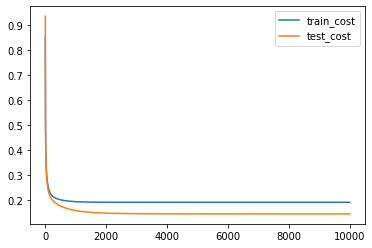

In [33]:
plt.plot(train_cost,label='train_cost')
plt.plot(test_cost,label='test_cost')
plt.legend();
